In [1]:
import janitor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal

In [2]:
%load_ext autoreload
%autoreload 2

Usamos solo data(ahi se encuentra las imagenes) y target(el numero a investigar)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Extraer la información para las variables independiente y dependiente, en X tenemos 70k imágenes y 784 características


In [7]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

Dibujamos el numero que se encuentra en la posición número 0 y modificamos la forma de 28x28

(-0.5, 27.5, 27.5, -0.5)

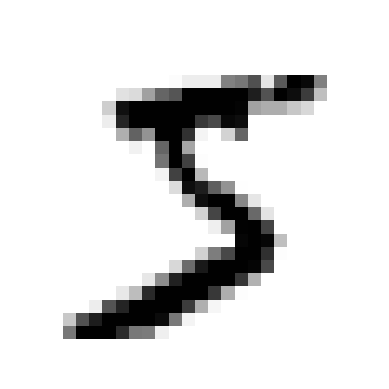

In [13]:
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')


Para comprobar que estamos viendo el número 5

In [14]:
y = y.astype(np.uint8)
y[0]

5

Dividimos el conjunto de entrenamiento y testing(asegurarnos que esten aletoriamente ordenado)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Entrenamiento del clasificador Binario

filtramos la información, como solo estamos buscando el 5 para este ejercicio

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

usaremos el algoritmo de clasificación `SGDClassifier`

In [24]:
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [25]:
sgd_classifier = SGDClassifier(random_state=42)

sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
sgd_classifier.predict([some_digit])

/home/sathony/miniforge3/envs/regresion_lineal/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Medir rendimiento

Que tan preciso es este modelo para predecir las imagenes somo no 5 `cross_val_score`, cv=3 devidimo en 3 el entrenamiento luego se saca el promedio de la clasificacion

In [26]:
from sklearn.model_selection import cross_val_score

Tiene una clasificación promedio de 95% exito

In [27]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Matriz de confusión

|||
|--|--|
|TN|FP|
|FN|TP|

In [28]:
from sklearn.model_selection import cross_val_predict

primero sacamos las predicción usando `cross_val_predict`

In [38]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)


Sacamos la matrix de confusion y lo mandamos la predicción del target

In [39]:
from sklearn.metrics import confusion_matrix


* Nos dice que 53892 estaba en lo correcto al decirnos que no era 5
* en 687 ocaciones dijo que era 5 pero se equivocó
* en 1891 dijo que no era 5 y se equivoco
* y 3530 dijo que era 5 y acertó

In [40]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

### Precision y Recall

In [33]:
from sklearn.metrics import precision_score, recall_score

Tenemos la precision en un 83%, es decir que nuestro algoritmo cada vez que detecta un 5 esta en lo correcto un 83%

In [34]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

En la memoria vemos un 65% que nuestro algoritmo es capaz de ver un 5

In [35]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### F1 Combina la precision y recall en una sola para obtener un promedio de que tan bueno es el modelo 

In [36]:
from sklearn.metrics import f1_score


In [37]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846